# k-Means


根据训练样本中是否包含标签信息，机器学习可以分为`监督学习`和`无监督学习`。`聚类算法`是典型的无监督学习，其训练的样本中值包含`样本的特征`，**不包含样本的标签信息**。在聚类算法中，利用样本的特征，将具有相似特征空间分布的样本划分到同一类别中。


## 1. 方法

由于具有出色的速度和良好的可扩展性，K-Means聚类算法算得上是最著名的聚类方法。***K-Means算法是一个重复移动类中心点的过程，把类的中心点，也称重心（centroids）***:
* 移动到其包含成员的平均位置;
* 然后重新划分其内部成员。

K是算法计算出的超参数，表示类的数量；K-Means可以自动分配样本到不同的类，但是不能决定究竟要分几个类。

K必须是一个比训练集样本数小的正整数。有时，类的数量是由问题内容指定的。例如，一个鞋厂有三种新款式，它想知道每种新款式都有哪些潜在客户，于是它调研客户，然后从数据里找出三类。也有一些问题没有指定聚类的数量，最优的聚类数量是不确定的。

K-Means的参数是类的重心位置和其内部观测值的位置。与广义线性模型和决策树类似，K-Means参数的最优解也是以成本函数最小化为目标。K-Means成本函数公式如下：
$$
J = \sum_{k=1}^{K} \sum_{i \in C_k} | x_i - u_k|^2
$$

$u_k$是第$k$个类的重心位置，定义为：
$$
u_k = \frac{1}{|C_k|} \sum_{i \in C_k} x_i
$$


成本函数是各个类畸变程度（distortions）之和。每个类的畸变程度等于该类重心与其内部成员位置距离的平方和。若类内部的成员彼此间越紧凑则类的畸变程度越小，反之，若类内部的成员彼此间越分散则类的畸变程度越大。

## 2. 算法
求解成本函数最小化的参数就是一个重复配置每个类包含的观测值，并不断移动类重心的过程。
1. 首先，类的重心是随机确定的位置。实际上，重心位置等于随机选择的观测值的位置。
2. 每次迭代的时候，K-Means会把观测值分配到离它们最近的类，然后把重心移动到该类全部成员位置的平均值那里。
3. 若达到最大迭代步数或两次迭代差小于设定的阈值则算法结束，否则重复步骤2。



## 3. 计算过程演示

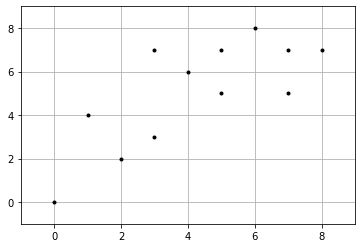

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

X0 = np.array([7, 5, 7, 3, 4, 1, 0, 2, 8, 6, 5, 3])
X1 = np.array([5, 7, 7, 3, 6, 4, 0, 2, 7, 8, 5, 7])
plt.figure()
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0, X1, 'k.');

假设K-Means初始化时，将第一个类的重心设置在第5个样本，第二个类的重心设置在第11个样本.那么我们可以把每个实例与两个重心的距离都计算出来，将其分配到最近的类里面。计算结果如下表所示：
![data_0](images/data_0.png)

新的重心位置和初始聚类结果如下图所示。第一类用X表示，第二类用点表示。重心位置用稍大的点突出显示。




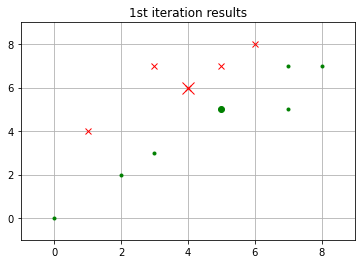

In [2]:
C1 = [1, 4, 5, 9, 11]
C2 = list(set(range(12)) - set(C1))
X0C1, X1C1 = X0[C1], X1[C1]
X0C2, X1C2 = X0[C2], X1[C2]
plt.figure()
plt.title('1st iteration results')
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0C1, X1C1, 'rx')
plt.plot(X0C2, X1C2, 'g.')
plt.plot(4,6,'rx',ms=12.0)
plt.plot(5,5,'g.',ms=12.0);

现在我们重新计算两个类的重心，把重心移动到新位置，并重新计算各个样本与新重心的距离，并根据距离远近为样本重新归类。结果如下表所示：

![data_1](images/data_1.png)

画图结果如下：

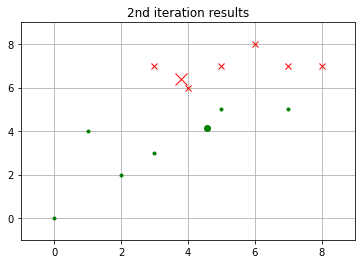

In [3]:
C1 = [1, 2, 4, 8, 9, 11]
C2 = list(set(range(12)) - set(C1))
X0C1, X1C1 = X0[C1], X1[C1]
X0C2, X1C2 = X0[C2], X1[C2]
plt.figure()
plt.title('2nd iteration results')
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0C1, X1C1, 'rx')
plt.plot(X0C2, X1C2, 'g.')
plt.plot(3.8,6.4,'rx',ms=12.0)
plt.plot(4.57,4.14,'g.',ms=12.0);

我们再重复一次上面的做法，把重心移动到新位置，并重新计算各个样本与新重心的距离，并根据距离远近为样本重新归类。结果如下表所示：
![data_2](images/data_2.png)

画图结果如下：


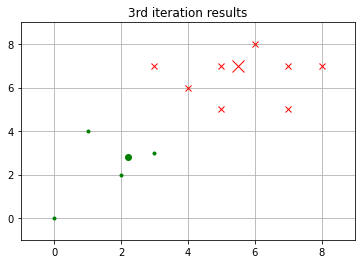

In [4]:
C1 = [0, 1, 2, 4, 8, 9, 10, 11]
C2 = list(set(range(12)) - set(C1))
X0C1, X1C1 = X0[C1], X1[C1]
X0C2, X1C2 = X0[C2], X1[C2]
plt.figure()
plt.title('3rd iteration results')
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0C1, X1C1, 'rx')
plt.plot(X0C2, X1C2, 'g.')
plt.plot(5.5,7.0,'rx',ms=12.0)
plt.plot(2.2,2.8,'g.',ms=12.0);

再重复上面的方法就会发现类的重心不变了，K-Means会在条件满足的时候停止重复聚类过程。通常，条件是前后两次迭代的成本函数值的差达到了限定值，或者是前后两次迭代的重心位置变化达到了限定值。如果这些停止条件足够小，K-Means就能找到最优解。不过这个最优解不一定是全局最优解。



## 4. Program

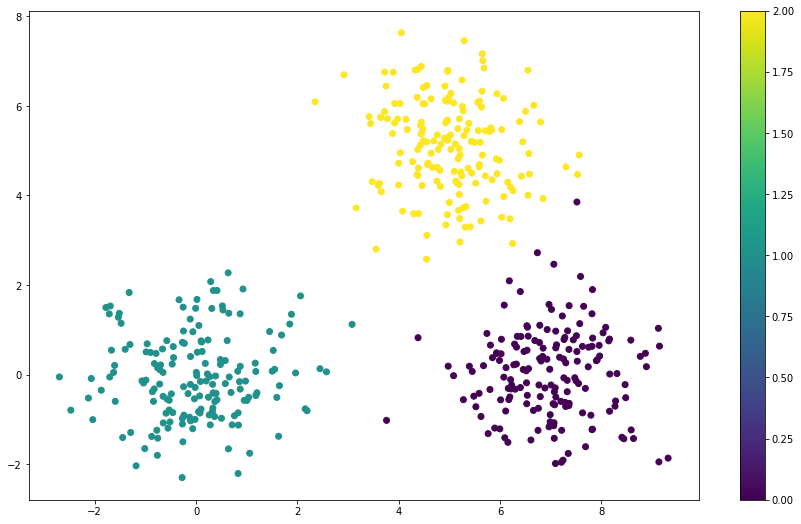

In [2]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

# import librarys
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random

# 生成数据
centers = [(7, 0), (0, 0), (5, 5)]
n_samples = 500

X, y = make_blobs(n_samples=n_samples, n_features=2, 
                  cluster_std=1.0, centers=centers, 
                  shuffle=True, random_state=42)

# 画出数据
plt.figure(figsize=(15, 9))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.colorbar()
plt.show()


In [4]:
# k-means

def calc_distance(v1, v2):
    return np.sum(np.square(v1-v2))

def rand_cluster_cents(X, k):
    """初始化聚类中心：通过在区间范围随机产生的值作为新的中心点"""

    # 样本数
    m=np.shape(X)[0]
    
    # 生成随机下标列表
    dataIndex=list(range(m))
    random.shuffle(dataIndex)
    centroidsIndex = dataIndex[:k]
    
    # 返回随机的聚类中心
    return X[centroidsIndex, :]

def kmeans(X, k):
    # 样本总数
    m = np.shape(X)[0]
    # 分配样本到最近的簇：存[簇序号,距离的平方] (m行 x 2 列)
    clusterAssment = np.zeros((m, 2))

    # step1: 通过随机产生的样本点初始化聚类中心
    centroids = rand_cluster_cents(X, k)
    print('最初的中心=', centroids)

    # 初始化迭代次数计数器
    iterN = 0
    
    # 所有样本分配结果不再改变，迭代终止
    while True:   
        # 标志位，如果迭代前后样本分类发生变化值为True，否则为False
        clusterChanged = False
    
        # step2:分配到最近的聚类中心对应的簇中
        for i in range(m):
            # 初始定义距离为无穷大
            minDist = np.inf;
            # 初始化索引值
            minIndex = -1
            # 计算每个样本与k个中心点距离
            for j in range(k):
                # 计算第i个样本到第j个中心点的距离
                distJI = calc_distance(centroids[j, :], X[i, :])
                # 判断距离是否为最小
                if distJI < minDist:
                    # 更新获取到最小距离
                    minDist = distJI
                    # 获取对应的簇序号
                    minIndex = j
            # 样本上次分配结果跟本次不一样，标志位clusterChanged置True
            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True
            clusterAssment[i, :] = minIndex, minDist ** 2  # 分配样本到最近的簇
            
        iterN += 1
        sse = sum(clusterAssment[:, 1])
        print('the SSE of %d' % iterN + 'th iteration is %f' % sse)
        
        # step3:更新聚类中心
        for cent in range(k):  # 样本分配结束后，重新计算聚类中心
            # 获取该簇所有的样本点,nonzero[0]表示A == cent的元素所在的行，如果没有[0],列也会表示
            ptsInClust = X[clusterAssment[:, 0] == cent, :]
            # 更新聚类中心：axis=0沿列方向求均值。
            centroids[cent, :] = np.mean(ptsInClust, axis=0)
        
        # 如果聚类重心没有发生改变，则退出迭代
        if not clusterChanged:
            break
            
    return centroids, clusterAssment


In [5]:
# 进行k-means聚类
k = 3  # 用户定义聚类数
mycentroids, clusterAssment = kmeans(X, k)

最初的中心= [[ 7.35701549 -0.6929096 ]
 [ 0.95042384 -0.57690366]
 [ 0.05572491  1.09419152]]
the SSE of 1th iteration is 239885.100070
the SSE of 2th iteration is 37348.235353
the SSE of 3th iteration is 8260.155429
the SSE of 4th iteration is 3635.163186
the SSE of 5th iteration is 3502.239035


In [12]:
def datashow(dataSet, k, centroids, clusterAssment):  # 二维空间显示聚类结果
    from matplotlib import pyplot as plt
    num, dim = np.shape(dataSet)  # 样本数num ,维数dim

    if dim != 2:
        print('sorry,the dimension of your dataset is not 2!')
        return 1
    marksamples = ['or', 'ob', 'og', 'ok', '^r', '^b', '<g']  # 样本图形标记
    if k > len(marksamples):
        print('sorry,your k is too large,please add length of the marksample!')
        return 1
        # 绘所有样本
    for i in range(num):
        markindex = int(clusterAssment[i, 0])  # 矩阵形式转为int值, 簇序号
        # 特征维对应坐标轴x,y；样本图形标记及大小
        plt.plot(dataSet[i, 0], dataSet[i, 1], marksamples[markindex], markersize=6)

    # 绘中心点
    markcentroids = ['o', '*', '^']  # 聚类中心图形标记
    label = ['0', '1', '2']
    c = ['yellow', 'pink', 'red']
    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], markcentroids[i], markersize=15, label=label[i], c=c[i])
        plt.legend(loc='upper left')  #图例
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')

    plt.title('k-means cluster result')  # 标题
    plt.show()
    
    
# 画出实际图像
def trgartshow(dataSet, k, labels):
    from matplotlib import pyplot as plt

    num, dim = np.shape(dataSet)
    label = ['0', '1', '2']
    marksamples = ['ob', 'or', 'og', 'ok', '^r', '^b', '<g']
    # 通过循环的方式，完成分组散点图的绘制
    for i in range(num):
        plt.plot(dataSet[i, 0], dataSet[i, 1], marksamples[int(labels[i])], markersize=6)

    
    # 添加轴标签和标题
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.title('true result')  # 标题

    # 显示图形
    plt.show()
    # label=labels.iat[i,0]

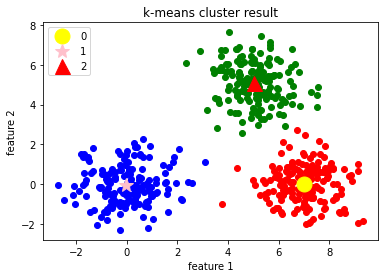

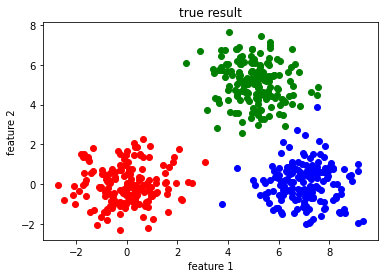

In [13]:
# 绘图显示
datashow(X, k, mycentroids, clusterAssment)
trgartshow(X, 3, y)

## 利用sklearn进行分类


<Figure size 432x288 with 0 Axes>

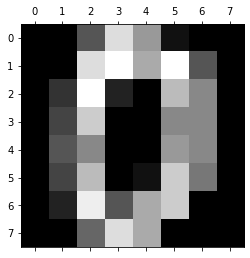

In [16]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

# load digital data
digits, dig_label = load_digits(return_X_y=True)

# draw one digital
plt.gray() 
plt.matshow(digits[0].reshape([8, 8])) 
plt.show() 

# calculate train/test data number
N = len(digits)
N_train = int(N*0.8)
N_test = N - N_train

# split train/test data
x_train = digits[:N_train, :]
y_train = dig_label[:N_train]
x_test  = digits[N_train:, :]
y_test  = dig_label[N_train:]



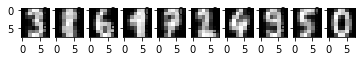

In [17]:
# do kmeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(x_train)

# kmeans.labels_ - output label
# kmeans.cluster_centers_ - cluster centers

# draw cluster centers
fig, axes = plt.subplots(nrows=1, ncols=10)
for i in range(10):
    img = kmeans.cluster_centers_[i].reshape(8, 8)
    axes[i].imshow(img)

## Exerciese - How to caluate the accuracy?

1. How to match cluster label to groundtruth label
2. How to solve the uncertainty of some digital

## 评估聚类性能

方法1： 如果被用来评估的数据本身带有正确的类别信息，则利用Adjusted Rand Index(ARI)，ARI与分类问题中计算准确性的方法类似，兼顾了类簇无法和分类标记一一对应的问题。



In [29]:
from sklearn.metrics import adjusted_rand_score

ari_train = adjusted_rand_score(y_train, kmeans.labels_)
print("ari_train = %f" % ari_train)

ari_train = 0.687021


Given the contingency table:
![ARI_ct](images/ARI_ct.png)

the adjusted index is:
![ARI_define](images/ARI_define.png)

* [ARI reference](https://davetang.org/muse/2017/09/21/adjusted-rand-index/)



方法2： 如果被用来评估的数据没有所属类别，则使用轮廓系数(Silhouette Coefficient)来度量聚类结果的质量，评估聚类的效果。**轮廓系数同时兼顾了聚类的凝聚度和分离度，取值范围是[-1,1]，轮廓系数越大，表示聚类效果越好。** 

轮廓系数的具体计算步骤： 
1. 对于已聚类数据中第i个样本$x_i$，计算$x_i$与其同一类簇内的所有其他样本距离的平均值，记作$a_i$，用于量化簇内的凝聚度 
2. 选取$x_i$外的一个簇$b$，计算$x_i$与簇$b$中所有样本的平均距离，遍历所有其他簇，找到最近的这个平均距离，记作$b_i$，用于量化簇之间分离度 
3. 对于样本$x_i$，轮廓系数为$sc_i = \frac{b_i−a_i}{max(b_i,a_i)}$ 
4. 最后，对所有样本集合$\mathbf{X}$求出平均值，即为当前聚类结果的整体轮廓系数。

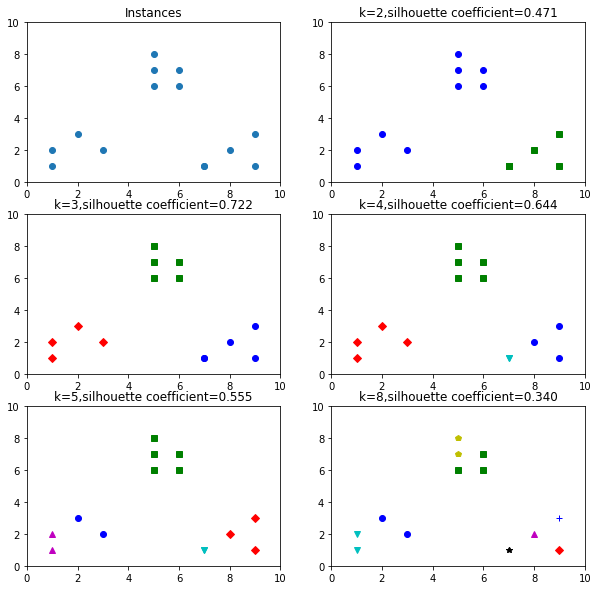

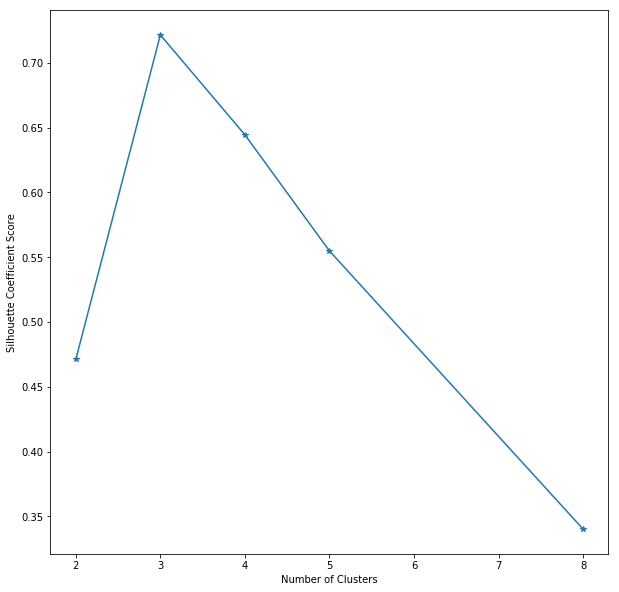

In [12]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(10,10)
plt.subplot(3,2,1)

x1=np.array([1,2,3,1,5,6,5,5,6,7,8,9,7,9])   #初始化原始数据
x2=np.array([1,3,2,2,8,6,7,6,7,1,2,1,1,3])
X=np.array(list(zip(x1,x2))).reshape(len(x1),2)

plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Instances')
plt.scatter(x1,x2)

colors=['b','g','r','c','m','y','k','b']
markers=['o','s','D','v','^','p','*','+']

clusters=[2,3,4,5,8]
subplot_counter=1
sc_scores=[]
for t in clusters:
    subplot_counter +=1
    plt.subplot(3,2,subplot_counter)
    kmeans_model=KMeans(n_clusters=t).fit(X)   #KMeans建模

    for i,l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i],x2[i],color=colors[l],marker=markers[l],ls='None')

    plt.xlim([0,10])
    plt.ylim([0,10])

    sc_score=silhouette_score(X,kmeans_model.labels_,metric='euclidean')   #计算轮廓系数
    sc_scores.append(sc_score)

    plt.title('k=%s,silhouette coefficient=%0.03f'%(t,sc_score))

plt.figure()
plt.plot(clusters,sc_scores,'*-')   #绘制类簇数量与对应轮廓系数关系
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')

plt.show()   

## 如何确定K

利用“肘部观察法”可以粗略地估计相对合理的聚类个数。K-means模型最终期望*所有数据点到其所属的类簇距离的平方和趋于稳定，所以可以通过观察这个值随着K的走势来找出最佳的类簇数量。理想条件下，这个折线在不断下降并且趋于平缓的过程中会有斜率的拐点，这表示从这个拐点对应的K值开始，类簇中心的增加不会过于破坏数据聚类的结构*。



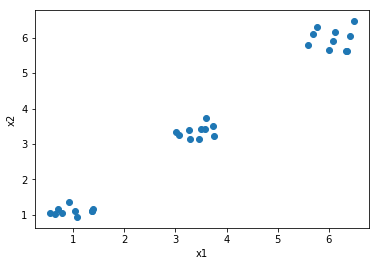

In [18]:
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

cluster1=np.random.uniform(0.5,1.5,(2,10))
cluster2=np.random.uniform(5.5,6.5,(2,10))
cluster3=np.random.uniform(3,4,(2,10))

X=np.hstack((cluster1,cluster2,cluster3)).T
plt.scatter(X[:,0],X[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

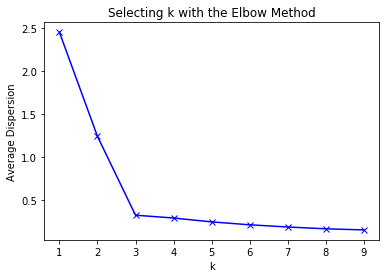

In [19]:
K=range(1,10)
meandistortions=[]

for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(\
        sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'),axis=1))/X.shape[0])

plt.plot(K,meandistortions,'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow Method')
plt.show()

从上图可见，类簇数量从1降到2再降到3的过程，更改K值让整体聚类结构有很大改变，这意味着新的聚类数量让算法有更大的收敛空间，这样的K值不能反映真实的类簇数量。而当K=3以后再增大K，平均距离的下降速度显著变缓慢，这意味着进一步增加K值不再会有利于算法的收敛，同时也暗示着K=3是相对最佳的类簇数量。

## References
* [机器学习聚类算法之K-Means](https://www.biaodianfu.com/k-means.html)